## Check VinDr CSV

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
os.listdir('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/')

['train.csv', 'val.csv']

In [14]:
csv_path = "/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/val.csv"
df = pd.read_csv(csv_path)
df['class_name'].replace("No finding", "No Finding", inplace=True)

df.head()

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,0010f549-b242-4e94-87a8-57d79de215fc,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/st...,No Finding,14
1,00575e3846ebd05a909d97ba59c53d30,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
2,005be26a68485912e007a3703f43d60a,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
3,007c1195aab852cff5c20736be26a1ae,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
4,00ad02393a5d0bd1e0dcf3196433499f,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [15]:
df.drop(columns=['level_1'], inplace=True)

In [16]:
df.shape, df['image_id'].nunique()

((1321, 9), 1100)

In [21]:
clsss = df['class_name'].unique().tolist()[1:]

In [33]:
counts = df['image_id'].value_counts().tolist()

In [34]:
len(counts)

1100

In [35]:
imgs = df['image_id'].unique().tolist()

In [37]:
count_1 = [idx for idx, i in enumerate(counts) if i > 1]
len(count_1)

134

In [40]:
gt_1_imgs = np.array(imgs)[count_1]

In [54]:
# df[df['image_id'].isin(gt_1_imgs)].sort_values(by=['image_id'])

for i in gt_1_imgs:
    if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
        # print(df[df['class_id']!=14][df['image_id'] ==[3]])
        break

/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14][df['image_id'] ==i])>0:
/tmp/ipykernel_185923/3706636338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['class_id']!=14

In [58]:
os.listdir('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/')

['rsna_vindr_cnet_csv',
 'vindr_only_csv',
 'new_csv',
 'train',
 'val',
 'archived',
 'test',
 'rsna_vindr_csv']

In [60]:
os.listdir('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/')

['train.csv', 'val.csv']

In [61]:
df_new = pd.read_csv('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/val.csv')

<Axes: xlabel='class_name'>

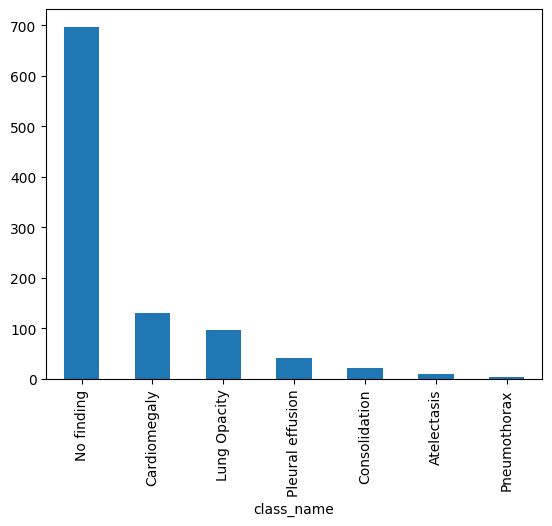

In [63]:
df_new['class_name'].value_counts().plot(kind='bar')

In [66]:
df.shape, df_new.shape

((1321, 9), (1000, 15))

In [56]:
df[df['class_id']!=14][df['image_id'] ==i]

/tmp/ipykernel_185923/2691642639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['class_id']!=14][df['image_id'] ==i]


,image_id,x_min,y_min,x_max,y_max,area,path,class_name,class_id
8,01a3c3d994d85ce5634d2d13c03fd4b0,NaN,NaN,NaN,NaN,2707.916667,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural Effusion,8
9,01a3c3d994d85ce5634d2d13c03fd4b0,111.833333,243.333333,177.166667,304.333333,2707.916667,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural Effusion,8
10,01a3c3d994d85ce5634d2d13c03fd4b0,114.666667,52.333333,171.833333,242.166667,2707.916667,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural Effusion,8
11,01a3c3d994d85ce5634d2d13c03fd4b0,173.000000,52.333333,242.666667,101.000000,2707.916667,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural Effusion,8


In [17]:
df.groupby('class_name').count()

,image_id,x_min,y_min,x_max,y_max,area,path,class_id
class_name,,,,,,,,
Atelectasis,9,6,6,6,6,9,9,9
Cardiomegaly,124,116,116,116,116,124,124,124
Consolidation,22,14,14,14,14,20,22,22
Lung Opacity,88,61,61,61,61,84,88,88
No Finding,914,0,0,0,0,0,914,914
Pleural Effusion,31,21,21,21,21,30,31,31
Pneumothorax,4,2,2,2,2,3,4,4
pneumonia,129,129,129,129,129,129,129,129


<Axes: xlabel='class_name'>

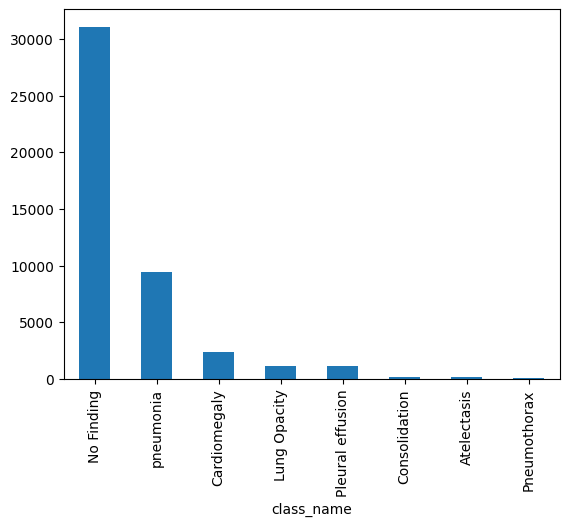

In [90]:
df['class_name'].value_counts().plot(kind='bar')

In [73]:
# def fix_path(path):
#     if "RSNA" in path:
#         return path.replace("RSNA-Pneunomia-Detection-PT", 'RSNA-Pneunomia-Detection-PT/stage_2_train_pt')
#     return path
# df['path'] = df['path'].apply(fix_path)


In [74]:
# df.to_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/val.csv", index=False)

In [75]:
rsna_paths = [i for i in df['path'].tolist() if "RSNA" in i]

In [77]:
os.listdir('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/')

['train.csv', 'val.csv']

<Axes: xlabel='class_name'>

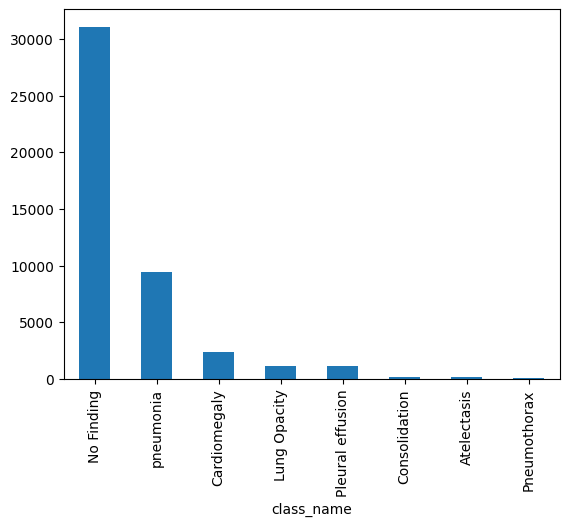

In [91]:
df['class_name'].value_counts().plot(kind='bar')

In [79]:
df = pd.read_csv("/home/aneeshashmi/generative/vindr_gen/pre_processed_csv/mimic/mimic_pt.csv")

In [80]:
# df[df.columns[13:-2]]

a = df.columns[13:-2].tolist()

In [82]:
csv_path = "/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/train.csv"
df = pd.read_csv(csv_path)
df['class_name'].replace("No finding", "No Finding", inplace=True)
df.head()

b = df['class_name'].unique().tolist()
b = [x.lower() for x in b]

In [86]:
commons =  [i for i in a if i.lower() in b]

In [102]:
dict(zip(sorted(df['class_name'].unique().tolist()), list(range(len(sorted(df['class_name'].unique().tolist()))))))

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Lung Opacity': 3,
 'No Finding': 4,
 'Pleural Effusion': 5,
 'Pneumothorax': 6,
 'pneumonia': 7}

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Lung Opacity',
 'No Finding',
 'Pleural effusion',
 'Pneumothorax',
 'pneumonia']

## Original CSVs

In [67]:
original_csv_dir = "/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/original_csv"
train_df = pd.read_csv(os.path.join(original_csv_dir, "train.csv"))
test_df = pd.read_csv(os.path.join(original_csv_dir, "test.csv"))

In [68]:
train_df.head()

,image_id,rad_id,class_name,x_min,y_min,x_max,y_max
0,000434271f63a053c4128a0ba6352c7f,R2,No finding,NaN,NaN,NaN,NaN
1,000434271f63a053c4128a0ba6352c7f,R3,No finding,NaN,NaN,NaN,NaN
2,000434271f63a053c4128a0ba6352c7f,R6,No finding,NaN,NaN,NaN,NaN
3,00053190460d56c53cc3e57321387478,R11,No finding,NaN,NaN,NaN,NaN
4,00053190460d56c53cc3e57321387478,R2,No finding,NaN,NaN,NaN,NaN


## Split train/val

In [1]:
import pandas as pd
import os

In [2]:
csv_path = "./vindr/annotations/vindr_rsna"
df = pd.read_csv(os.path.join(csv_path, "train.csv"))
df.head()

,image_id,class_idx,x_min,y_min,x_max,y_max,original_width,original_height,area,path,class_name,png_path,class,class_id
0,0005e8e3701dfb1dd93d53e2ff537b6e,5.0,155.411997,94.629832,199.628337,149.401499,3072.0,3072.0,2421.802623,/share/ssddata/vindr_pt_512x512/train/0005e8e3...,Consolidation,NaN,NaN,NaN
1,0005e8e3701dfb1dd93d53e2ff537b6e,11.0,150.159495,97.968170,200.893331,148.118500,3072.0,3072.0,2544.318590,/share/ssddata/vindr_pt_512x512/train/0005e8e3...,Lung Opacity,NaN,NaN,NaN
2,0005e8e3701dfb1dd93d53e2ff537b6e,11.0,150.159495,97.968170,200.893331,148.118500,3072.0,3072.0,2544.318590,/share/ssddata/vindr_pt_512x512/train/0005e8e3...,Lung Opacity,NaN,NaN,NaN
3,0007d316f756b3fa0baea2ff514ce945,3.0,200.453328,324.931554,406.593343,362.136892,2304.0,2880.0,7669.509032,/share/ssddata/vindr_pt_512x512/train/0007d316...,Cardiomegaly,NaN,NaN,NaN
4,000d68e42b71d3eac10ccc077aba07c1,11.0,37.997335,85.052089,452.102214,263.532444,2304.0,2880.0,73909.585690,/share/ssddata/vindr_pt_512x512/train/000d68e4...,Lung Opacity,NaN,NaN,NaN


In [3]:
import random 
random.seed(23)

In [4]:
all_imgs = df['image_id'].unique().tolist()
val_imgs = random.sample(all_imgs, 1000)
train_imgs = [i for i in all_imgs if i not in val_imgs]

len(all_imgs), len(val_imgs), len(train_imgs)

(29600, 1000, 28600)

In [5]:
train_df = df[df['image_id'].isin(train_imgs)]
val_df = df[df['image_id'].isin(val_imgs)]

In [6]:
train_df.to_csv(os.path.join(csv_path, "train.csv"), index=False)
val_df.to_csv(os.path.join(csv_path, "val.csv"), index=False)